In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'lombardia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2021-04-11T17:00:00,3,Lombardia,5896,814,6710,72770,79480,442,2302,...,77.0,41303.0,9010.0,615.0,12.13,8.44,5.57,25.55,-1.21,0.56
412,2021-04-12T17:00:00,3,Lombardia,5763,811,6574,66113,72687,-6793,997,...,62.0,19022.0,4667.0,-6657.0,12.34,9.04,5.24,21.36,-0.37,-8.55
413,2021-04-13T17:00:00,3,Lombardia,5727,787,6514,64827,71341,-1346,1975,...,94.0,38490.0,5627.0,-1286.0,12.08,9.13,5.13,35.10,-2.96,-1.85
414,2021-04-14T17:00:00,3,Lombardia,5589,781,6370,63694,70064,-1277,2153,...,85.0,50487.0,8586.0,-1133.0,12.26,9.09,4.26,25.08,-0.76,-1.79


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2722
Nuovi tamponi: 52293.0
Percentuale nuovi positivi/nuovi tamponi: 5.2 %
Nuovi guariti: 4803.0
Nuovi deceduti: 65.0
Variazione positivi ricoverati con sintomi: -202.0
Variazione positivi in terapia intensiva: -42.0
Variazione positivi in isolamento dimiciliare: -1902.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,3,Lombardia,3562,364,3926,46691,50617,1466,1987,...,21.0,30289.0,9722.0,1479.0,9.27,7.76,6.56,20.44,-0.27,2.98
1,2021-02-15T17:00:00,3,Lombardia,3572,366,3938,44692,48630,-1987,945,...,35.0,14260.0,5103.0,-1999.0,9.29,8.10,6.63,18.52,0.55,-3.93
2,2021-02-16T17:00:00,3,Lombardia,3693,373,4066,44607,48673,43,1696,...,38.0,29846.0,7853.0,-85.0,9.17,8.35,5.68,21.60,1.91,0.09
3,2021-02-17T17:00:00,3,Lombardia,3740,363,4103,44590,48693,20,1764,...,29.0,38296.0,9069.0,-17.0,8.85,8.43,4.61,19.45,-2.68,0.04
4,2021-02-18T17:00:00,3,Lombardia,3716,368,4084,45889,49973,1280,2540,...,55.0,42508.0,11584.0,1299.0,9.01,8.17,5.98,21.93,1.38,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-11T17:00:00,3,Lombardia,5896,814,6710,72770,79480,442,2302,...,77.0,41303.0,9010.0,615.0,12.13,8.44,5.57,25.55,-1.21,0.56
57,2021-04-12T17:00:00,3,Lombardia,5763,811,6574,66113,72687,-6793,997,...,62.0,19022.0,4667.0,-6657.0,12.34,9.04,5.24,21.36,-0.37,-8.55
58,2021-04-13T17:00:00,3,Lombardia,5727,787,6514,64827,71341,-1346,1975,...,94.0,38490.0,5627.0,-1286.0,12.08,9.13,5.13,35.10,-2.96,-1.85
59,2021-04-14T17:00:00,3,Lombardia,5589,781,6370,63694,70064,-1277,2153,...,85.0,50487.0,8586.0,-1133.0,12.26,9.09,4.26,25.08,-0.76,-1.79


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

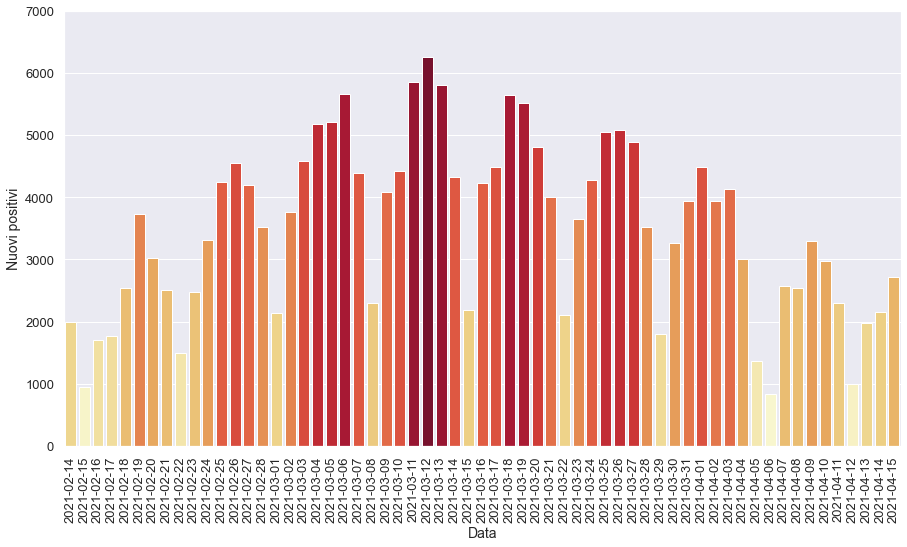

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

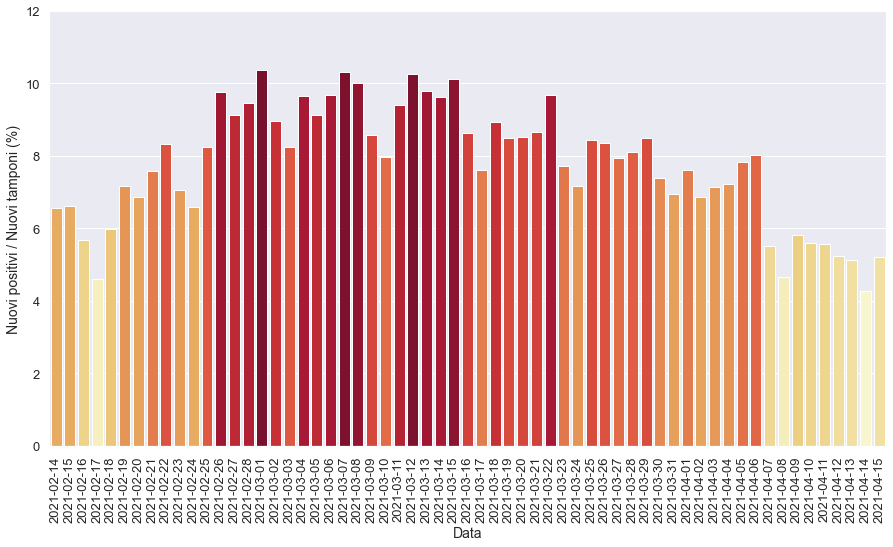

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

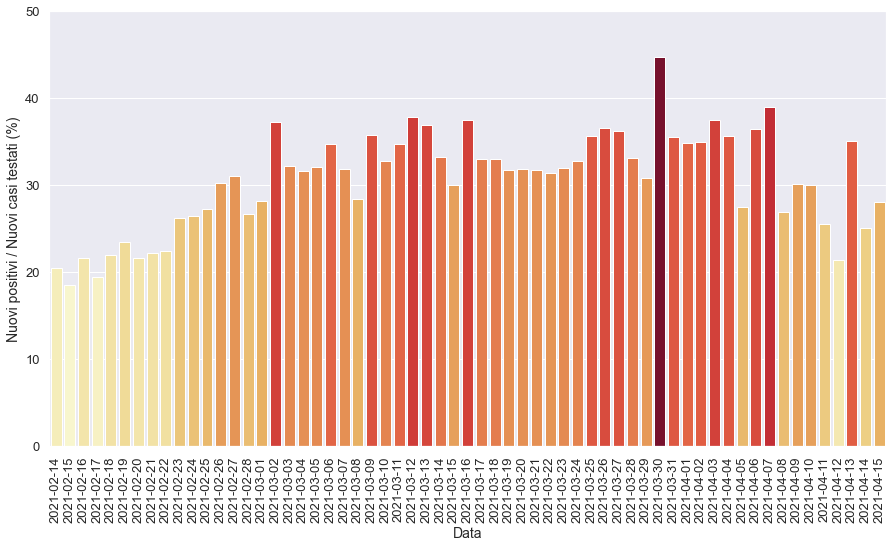

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

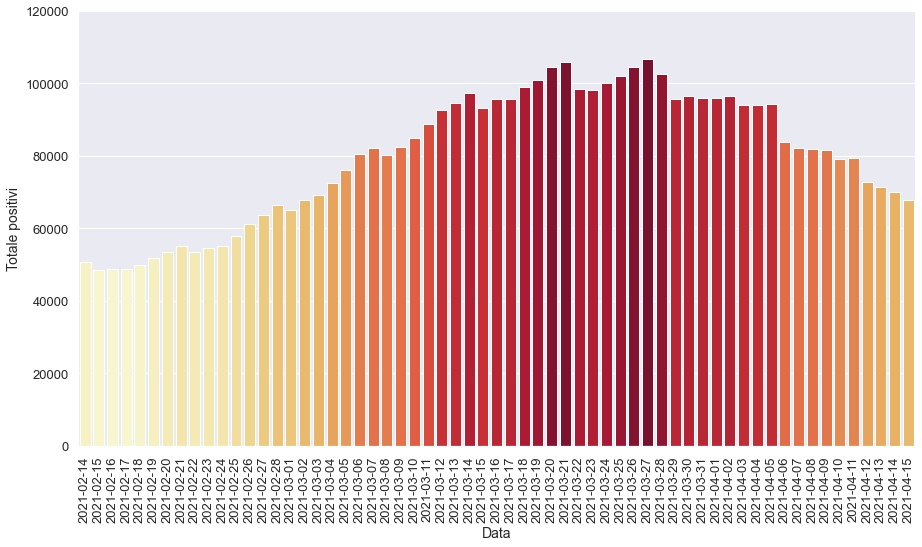

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

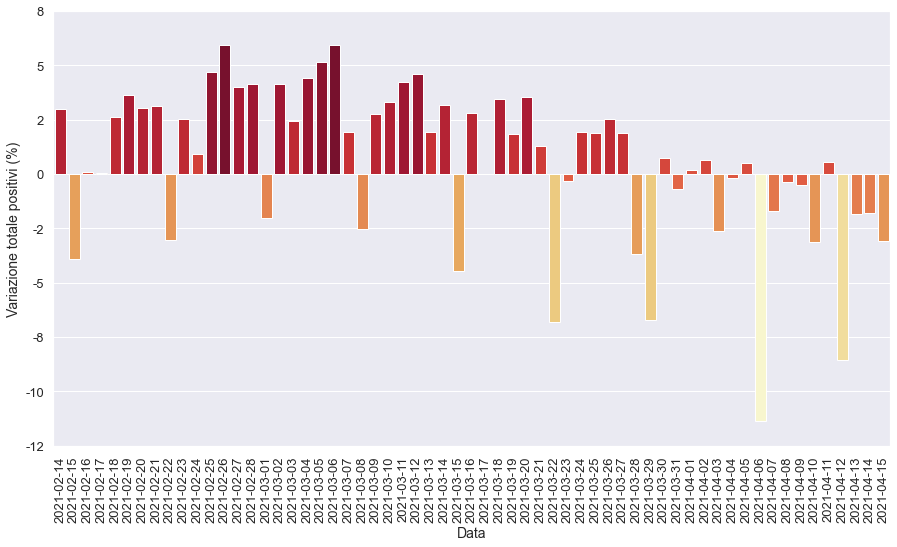

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

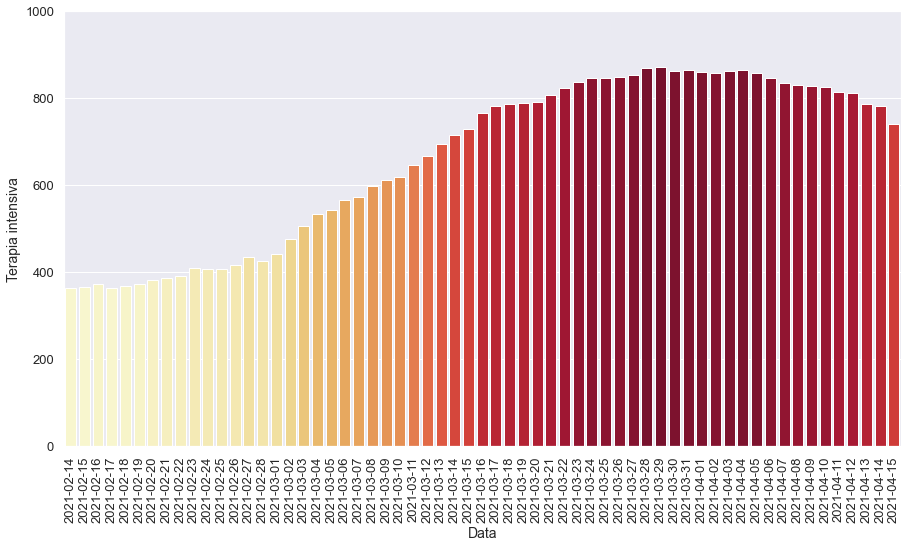

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

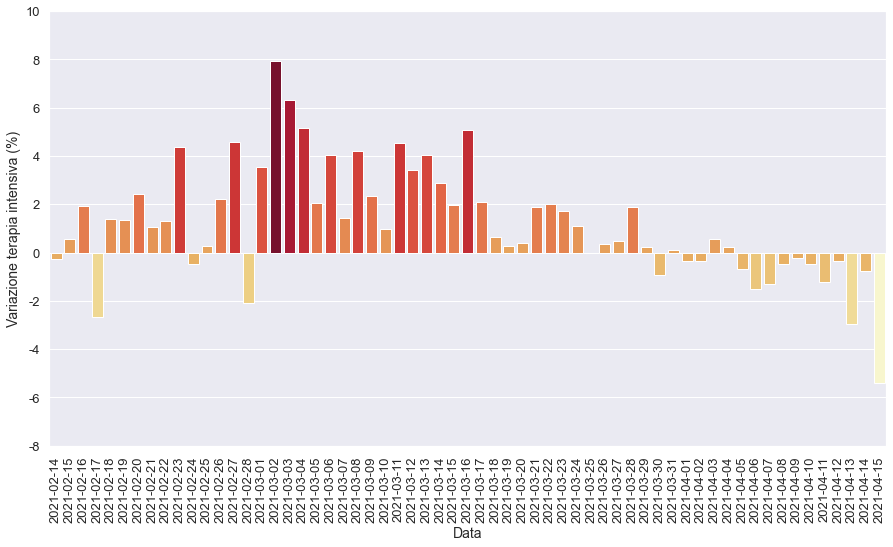

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

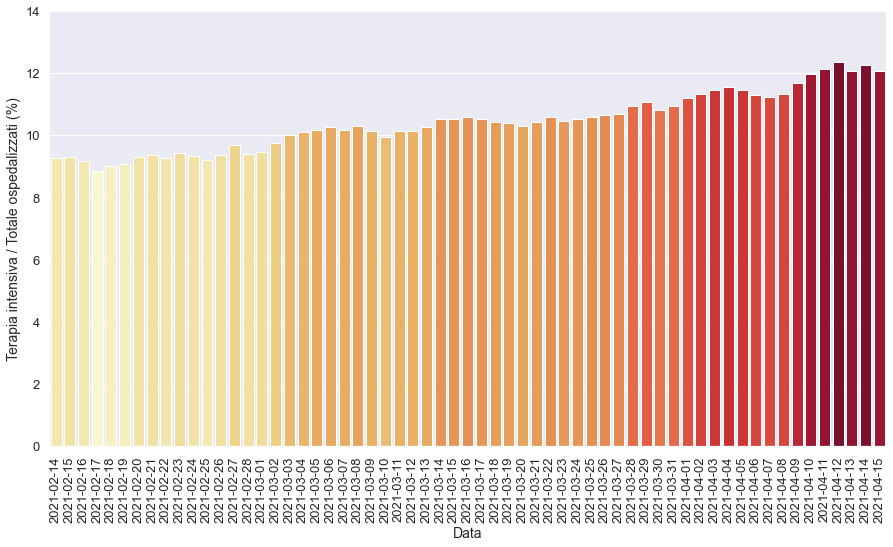

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

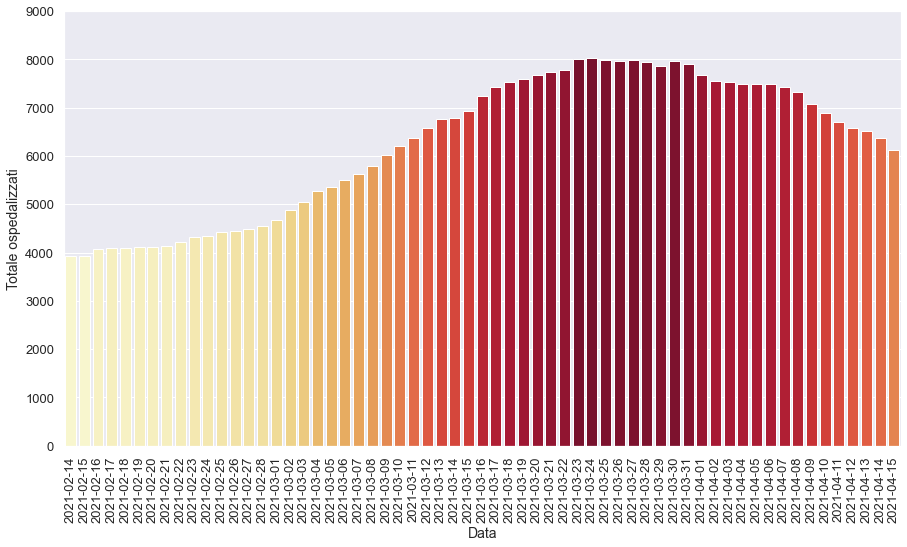

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

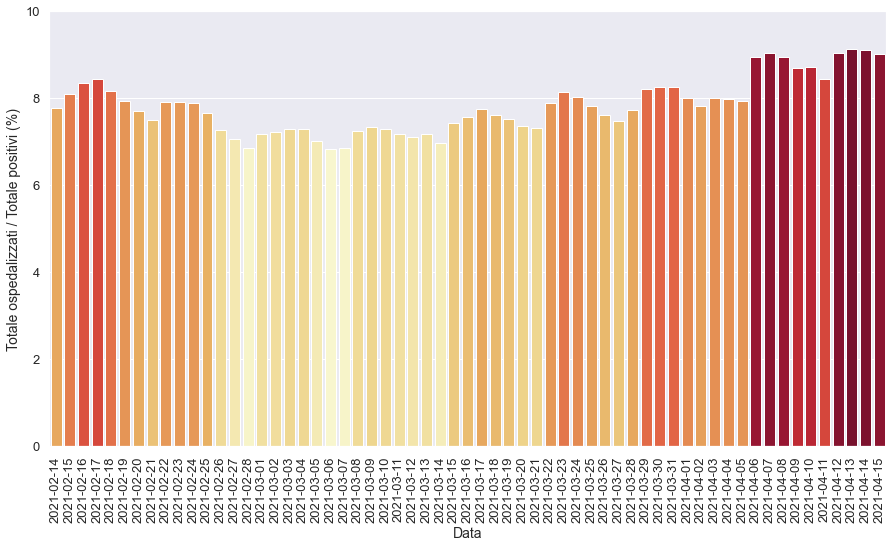

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

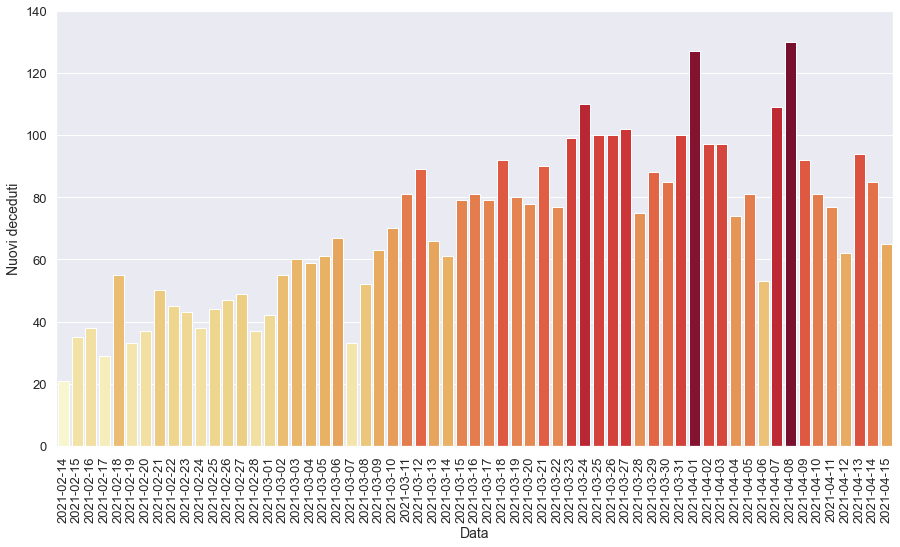

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

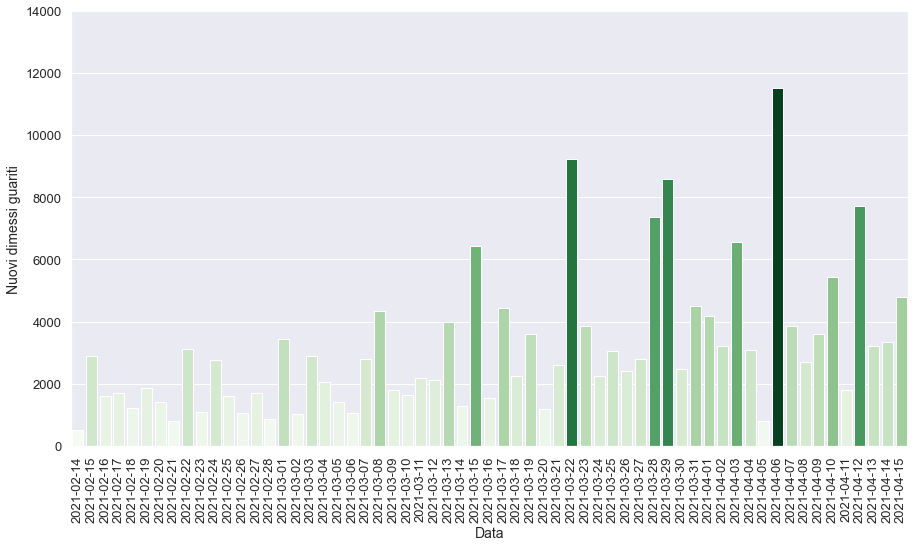

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-16T17:00:00,3,Lombardia,6474,765,7239,88537,95776,2613,4235,...,81.0,49068.0,11294.0,2300.0,10.57,7.56,8.63,37.50,5.08,2.80
1,2021-03-17T17:00:00,3,Lombardia,6641,781,7422,88343,95765,-11,4490,...,79.0,59009.0,13610.0,-194.0,10.52,7.75,7.61,32.99,2.09,-0.01
2,2021-03-18T17:00:00,3,Lombardia,6744,786,7530,91539,99069,3304,5641,...,92.0,63197.0,17078.0,3196.0,10.44,7.60,8.93,33.03,0.64,3.45
3,2021-03-19T17:00:00,3,Lombardia,6796,788,7584,93320,100904,1835,5518,...,80.0,64999.0,17422.0,1781.0,10.39,7.52,8.49,31.67,0.25,1.85
4,2021-03-20T17:00:00,3,Lombardia,6891,791,7682,96769,104451,3547,4810,...,78.0,56383.0,15142.0,3449.0,10.30,7.35,8.53,31.77,0.38,3.52
5,2021-03-21T17:00:00,3,Lombardia,6926,806,7732,98043,105775,1324,4003,...,90.0,46150.0,12632.0,1274.0,10.42,7.31,8.67,31.69,1.90,1.27
6,2021-03-22T17:00:00,3,Lombardia,6952,822,7774,90789,98563,-7212,2105,...,77.0,21732.0,6722.0,-7254.0,10.57,7.89,9.69,31.32,1.99,-6.82
7,2021-03-23T17:00:00,3,Lombardia,7165,836,8001,90255,98256,-307,3643,...,99.0,47175.0,11422.0,-534.0,10.45,8.14,7.72,31.89,1.70,-0.31
8,2021-03-24T17:00:00,3,Lombardia,7178,845,8023,92149,100172,1916,4282,...,110.0,59626.0,13089.0,1894.0,10.53,8.01,7.18,32.71,1.08,1.95
9,2021-03-25T17:00:00,3,Lombardia,7132,845,7977,94101,102078,1906,5046,...,100.0,59696.0,14147.0,1952.0,10.59,7.81,8.45,35.67,0.00,1.90


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

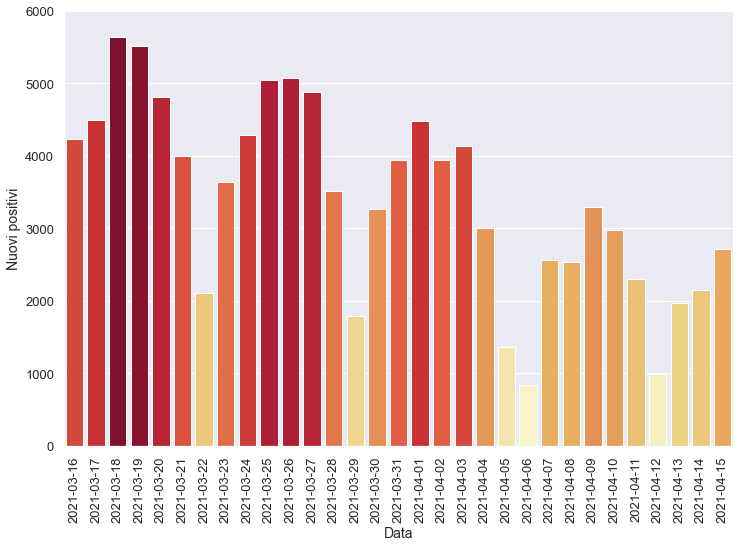

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

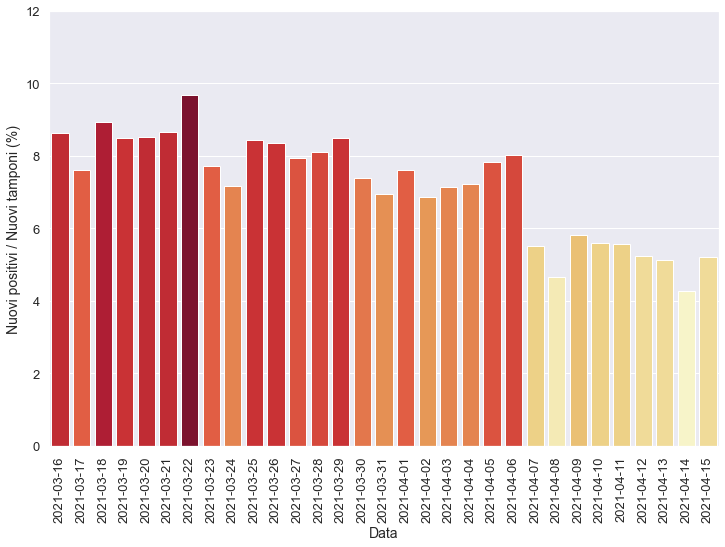

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

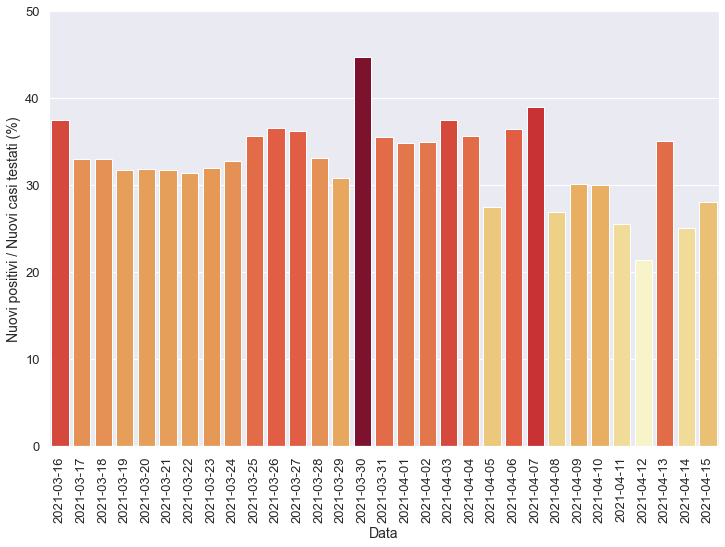

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

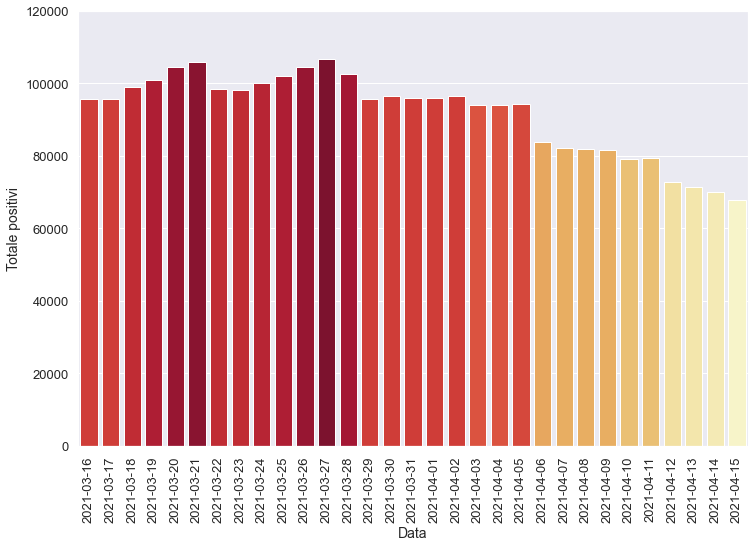

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

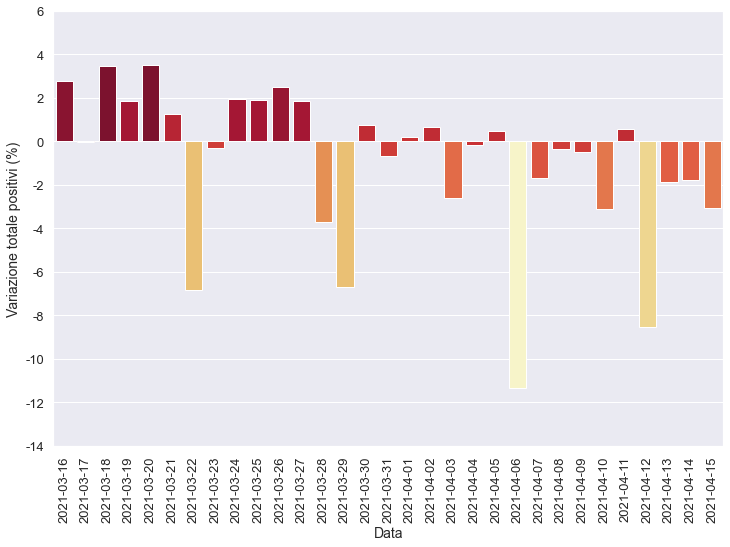

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

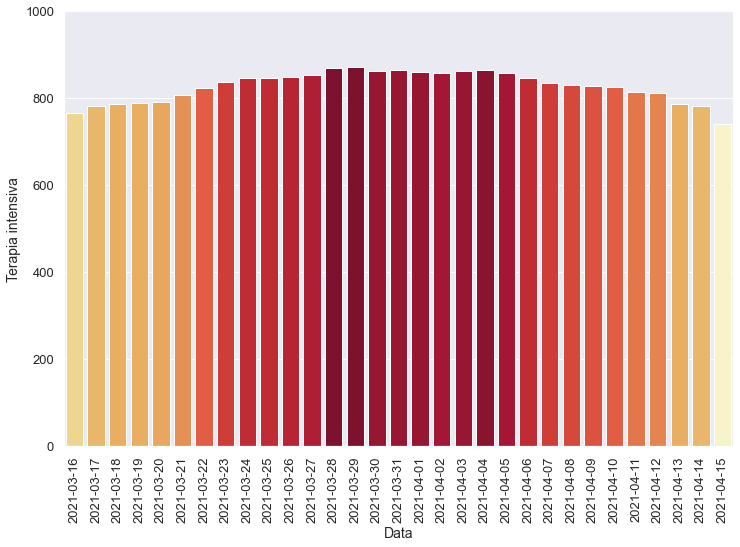

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

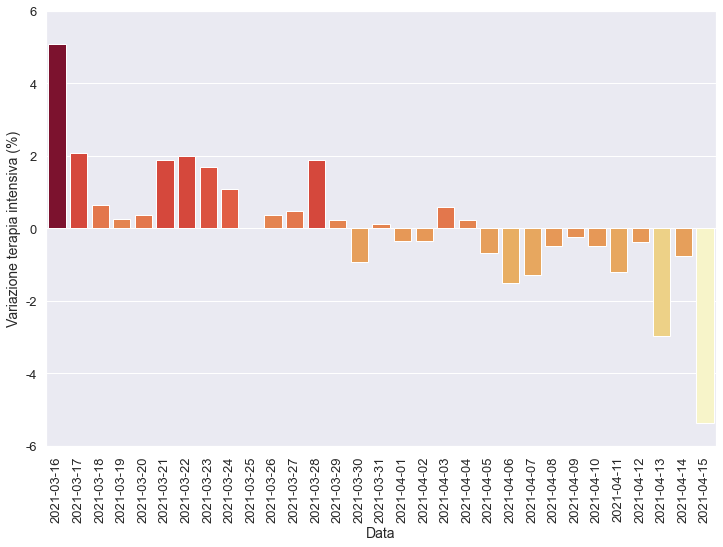

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

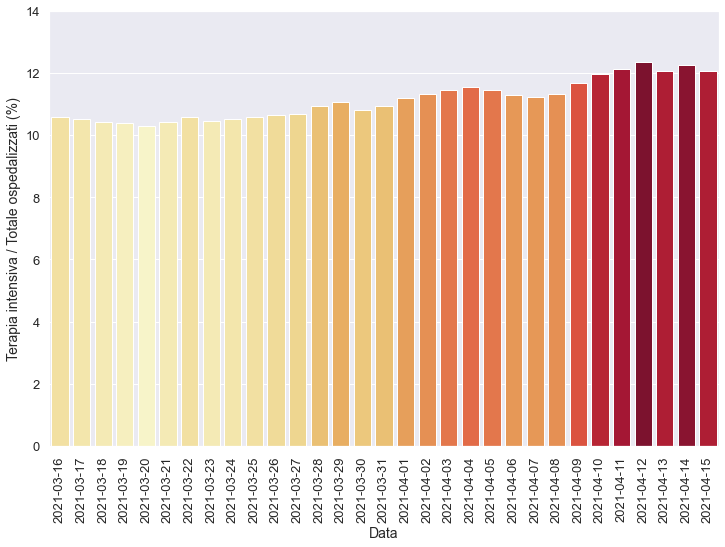

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

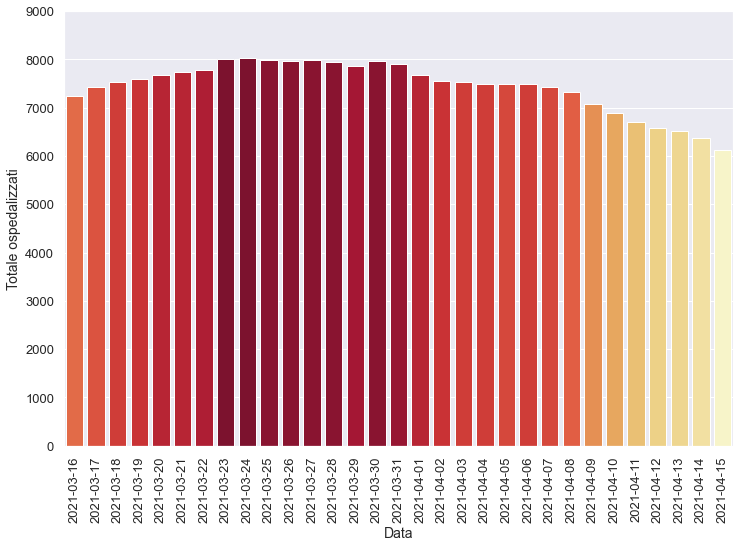

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

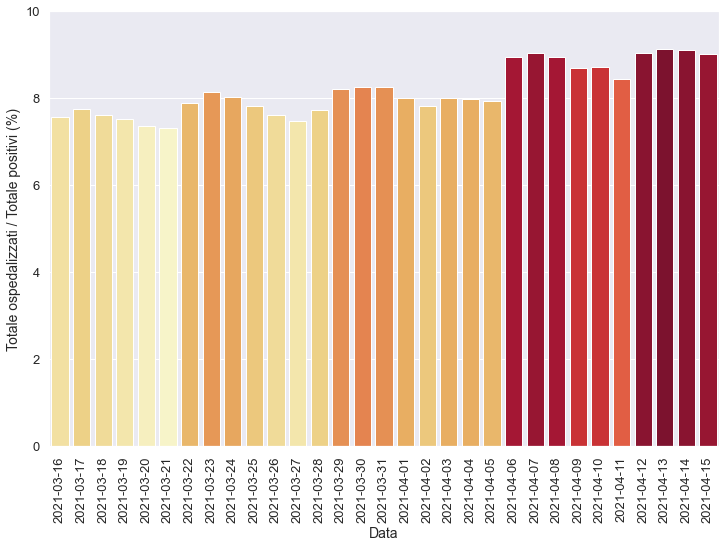

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

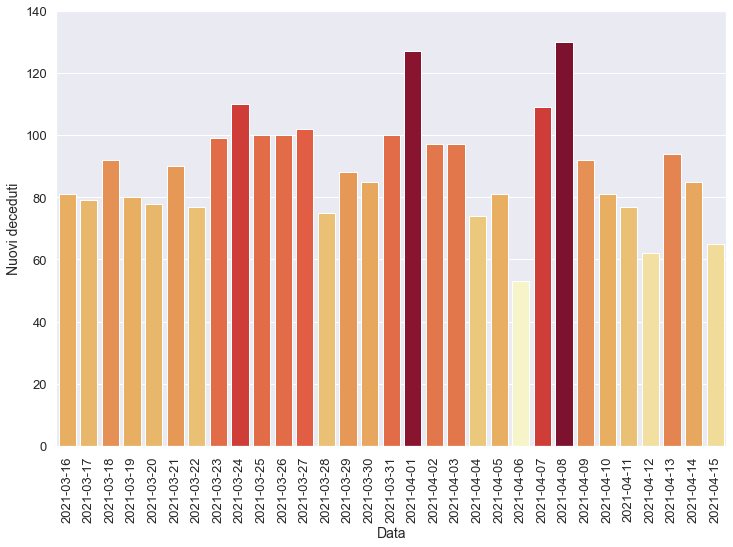

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

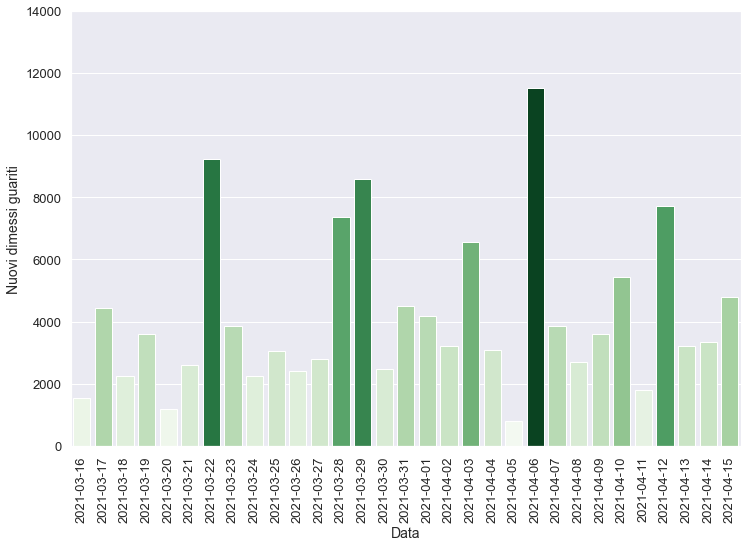

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-08T17:00:00,3,Lombardia,6501,830,7331,74664,81995,-298,2537,...,130.0,54280.0,9420.0,-200.0,11.32,8.94,4.67,26.93,-0.48,-0.36
1,2021-04-09T17:00:00,3,Lombardia,6252,828,7080,74499,81579,-416,3289,...,92.0,56476.0,10931.0,-165.0,11.69,8.68,5.82,30.09,-0.24,-0.51
2,2021-04-10T17:00:00,3,Lombardia,6059,824,6883,72155,79038,-2541,2974,...,81.0,53133.0,9910.0,-2344.0,11.97,8.71,5.60,30.01,-0.48,-3.11
3,2021-04-11T17:00:00,3,Lombardia,5896,814,6710,72770,79480,442,2302,...,77.0,41303.0,9010.0,615.0,12.13,8.44,5.57,25.55,-1.21,0.56
4,2021-04-12T17:00:00,3,Lombardia,5763,811,6574,66113,72687,-6793,997,...,62.0,19022.0,4667.0,-6657.0,12.34,9.04,5.24,21.36,-0.37,-8.55
5,2021-04-13T17:00:00,3,Lombardia,5727,787,6514,64827,71341,-1346,1975,...,94.0,38490.0,5627.0,-1286.0,12.08,9.13,5.13,35.10,-2.96,-1.85
6,2021-04-14T17:00:00,3,Lombardia,5589,781,6370,63694,70064,-1277,2153,...,85.0,50487.0,8586.0,-1133.0,12.26,9.09,4.26,25.08,-0.76,-1.79
7,2021-04-15T17:00:00,3,Lombardia,5387,739,6126,61792,67918,-2146,2722,...,65.0,52293.0,9713.0,-1902.0,12.06,9.02,5.21,28.02,-5.38,-3.06


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

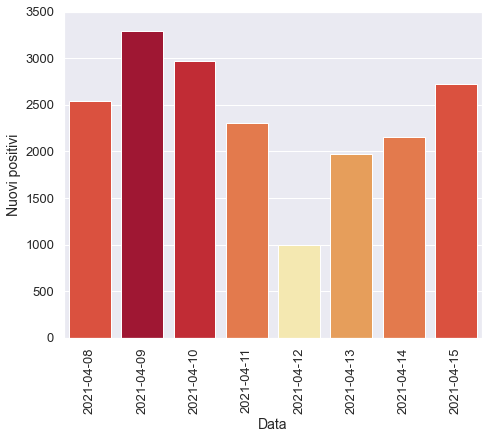

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

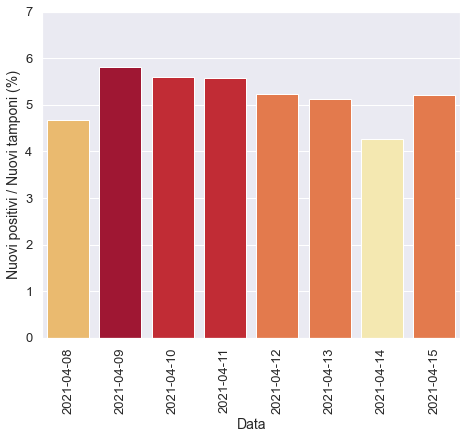

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

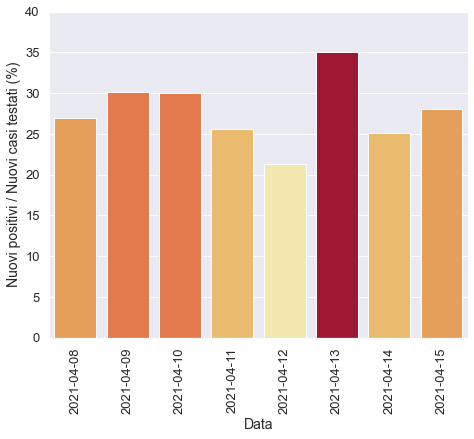

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

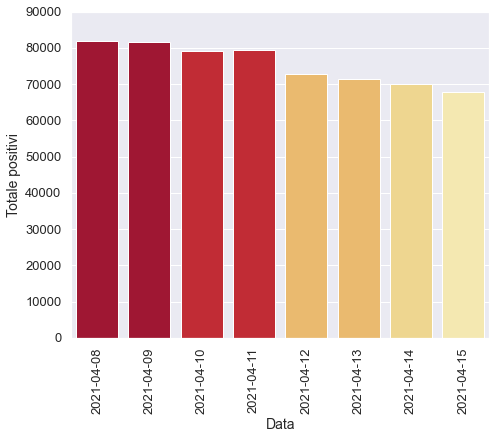

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

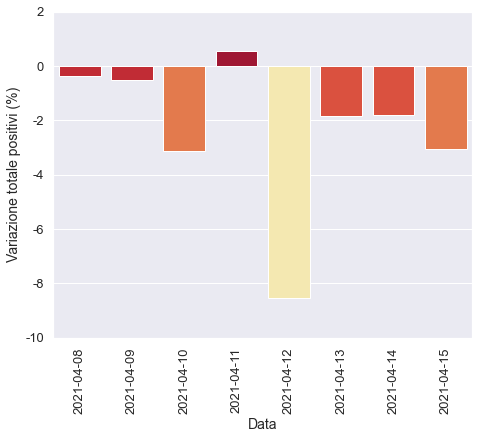

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

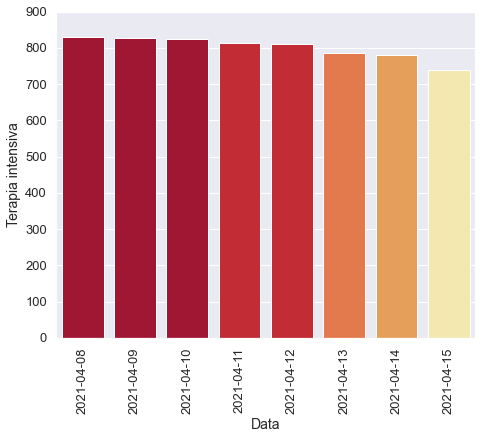

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

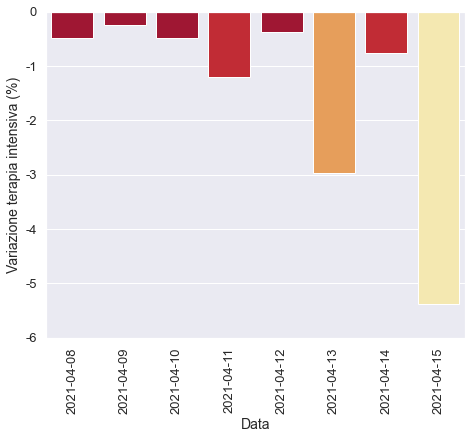

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

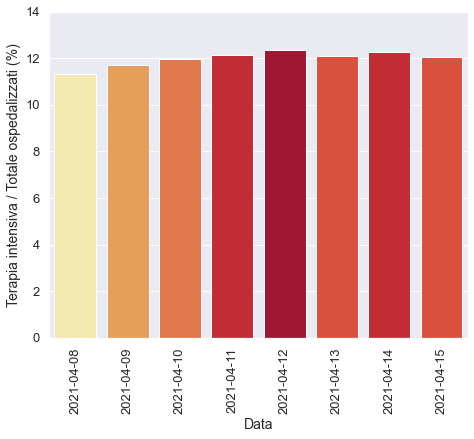

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

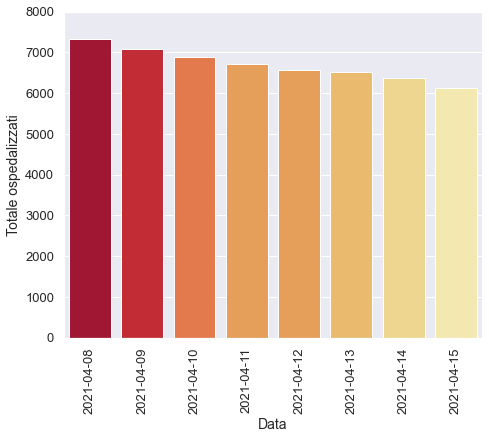

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

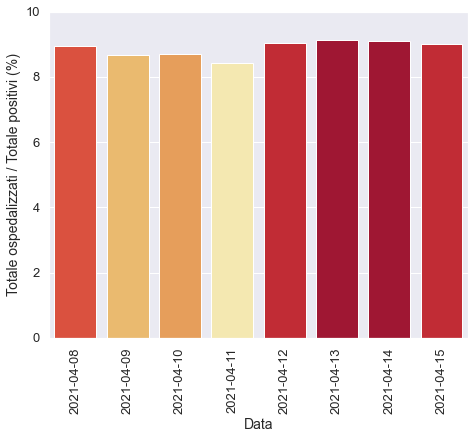

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

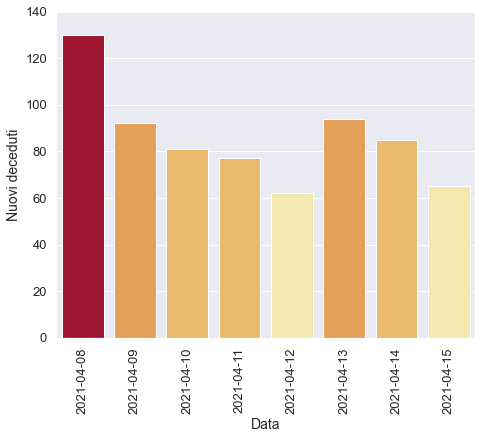

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

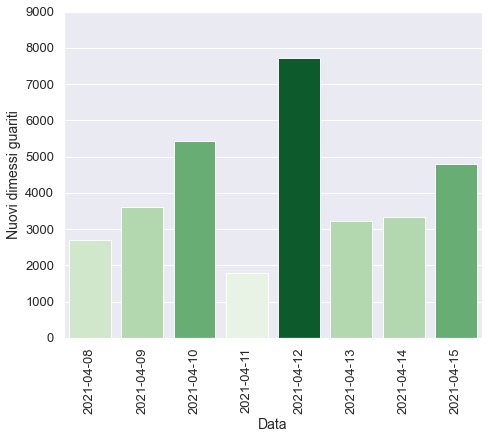

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)